In [1]:
import json
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def two_hours_forward(timestamp_string: str):
    date, time = timestamp_string.split(' ')
    year, month, day = date.split('-')
    hour, minute, second = time.split(':')
    date = datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))
    date += datetime.timedelta(hours=2)
    return date

In [3]:
def get_weekday(timestamp_string: str):
    weekday_names_dict = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    extracted_date = timestamp_string[:10]
    date_list = extracted_date.split('-')
    year, month, day = int(date_list[0]), int(date_list[1]) , int(date_list[2])
    extracted_date = datetime.datetime(year, month, day)
    return weekday_names_dict[extracted_date.weekday()]

In [4]:
def extract_time(timestamp_string: str):
    return timestamp_string[11:16].replace('.', ':')

In [6]:
timestamp_dictionary = dict()
freestanding_bikes = []

# Extracting stations info for stations in Warsaw
with open('json_files/2024-08-18to25-veturilo.json', 'r', encoding='utf8') as file:
    for line in file:
        data_piece = json.loads(line)
        if data_piece['city_uid'] == 812:
            timestamp = str(two_hours_forward(data_piece['timestamp']['$date'].replace('T', ' ')[:-1])).replace(':', '.')
            if not timestamp in timestamp_dictionary.keys():
                timestamp_dictionary[timestamp] = []
            timestamp_dictionary[timestamp].append(data_piece)

In [9]:
data = {'monday': {},
        'tuesday': {},
        'wednesday': {},
        'thursday': {},
        'friday': {},
        'saturday': {},
        'sunday': {}}

flag = True
for timestamp in list(timestamp_dictionary.keys()):
    freestanding = 0
    weekday = get_weekday(timestamp)
    time = extract_time(timestamp)
    data[weekday][time] = []
    for station in timestamp_dictionary[timestamp]:
        if station['bike']:
            if 52.2194 > station['lat'] > 52.2132 and 21.0272 > station['lng'] > 21.0258:
                freestanding += 1
    
    data[weekday][time].append(freestanding)        
    
            

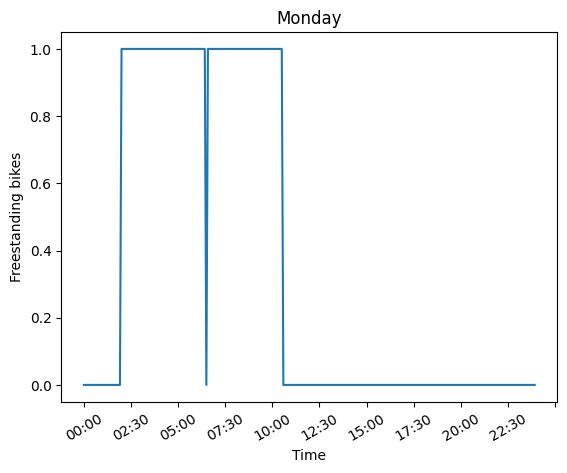

In [14]:
di1 = []
di2 = []
for key, value in data['monday'].items():
    di1.append(key)
    di2.append(sum(value)/len(value))
    
plt.plot(di1, di2)
plt.title("Monday")
plt.xlabel("Time")
plt.ylabel("Freestanding bikes")
plt.tick_params(axis='x', labelrotation = 30)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=11))
plt.show()

In [67]:
get_weekday('2024-08-19 00.50.00')

'monday'

In [69]:
extract_time('2024-08-19 00.50.00')

'00.50'